<h1>Laboratorio 5 (Aprendizaje no supervizado) Grupo 1</h1>

<h3>Nombres:</h3>

* Romero Taboada Luis Fernando
* Apaza Guzman Juan Agustin
* Vargas Gonzales Hector Daniel
* Chura Padilla Walberth Jesus
* Coa Veliz Diego Armando

CARRERA: INGENIERIA DE SISTEMAS

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
n_clusters = np.random.randint(1, 11) # genera numeros aleatorios desde 1 al 10
blob_centers = np.random.uniform(low=-3, high=3, size=(n_clusters, 2)) # generamos un arreglo de los centroides
blob_std = np.random.uniform(low=0.1, high=0.5, size=n_clusters) # generamos un array para la desviacion estandar con valores minimos para que no se superpongan

X, y = make_blobs(n_samples=5000, centers=blob_centers, cluster_std=blob_std, random_state=7)

print(f'Número de clusters: {n_clusters}')
X.shape

Número de clusters: 5


(5000, 2)

In [ ]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
  plt.scatter(X[:, 0],X[:, 1], c=y, s=1)
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)

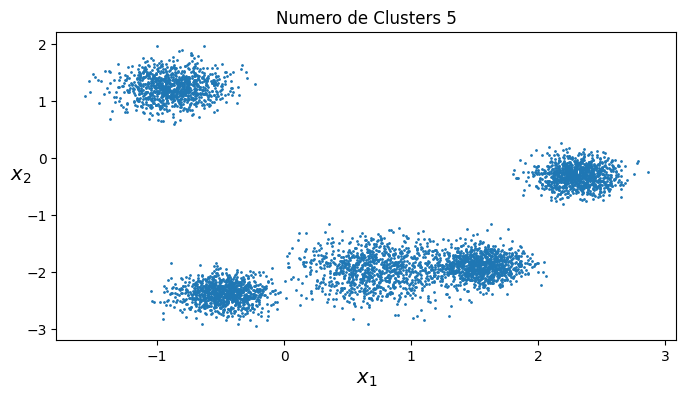

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.title(f'Numero de Clusters {n_clusters}')
plt.show()

# Uso de K-Means

K-Means es un algoritmo de clustering que se utilliza para agrupar datosen grupos (llamados clústeres) basandose en caracteristicas similares, es uno de los algoritmos de clusteres mas comunes y altamente utilizados en el aprendizaje automático.

In [ ]:
from sklearn.cluster import KMeans

k = n_clusters # recuperamos el numero de clusters que generamos aleatoriamente

kmeans = KMeans(n_clusters=k, random_state=42) # crea un modelo de K-Means con el numero k de clusteres
y_pred = kmeans.fit_predict(X) # ajusta el modelo  a los datos X y predice a que cluster pertenece cada punto
y_pred.shape

(5000,)

la cantidad de labels es: 5000


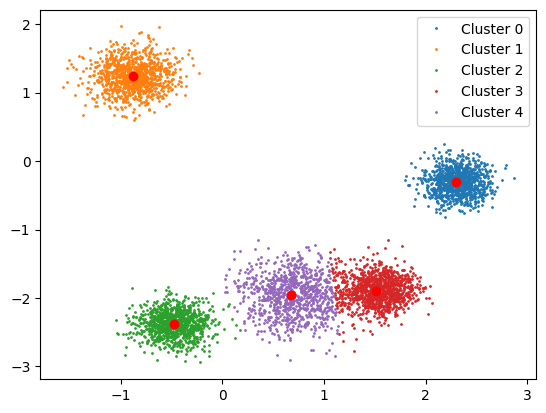

In [ ]:
for i in range(k):
    plt.plot(X[y_pred == i, 0], X[y_pred == i, 1], 'o', label="Cluster %d" % i, markersize=1)
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'o', color='red')
    plt.legend()

print("la cantidad de labels es:",len(kmeans.labels_))

# Muestra de los centroides

Mostramos los centroides de los clusteres obtenidos despues de ajustar el modelo KMeans a los datos

In [ ]:
kmeans.cluster_centers_

array([[ 2.30378299, -0.30901863],
       [-0.88058282,  1.23832409],
       [-0.47319428, -2.37811228],
       [ 1.51574328, -1.89078224],
       [ 0.67345684, -1.95997165]])

# Definimos nuevas muestras para predecir sus clusters

In [ ]:
X_new = np.array([[0, 2.5], [3, -1], [5, 1], [-2, 3], [2, -1], [0, -1.5]])
y_pred_new = kmeans.predict(X_new)

print(y_pred_new)

[1 0 0 1 0 4]


# Graficamos los puntos originales y mostramos las muestras generadas

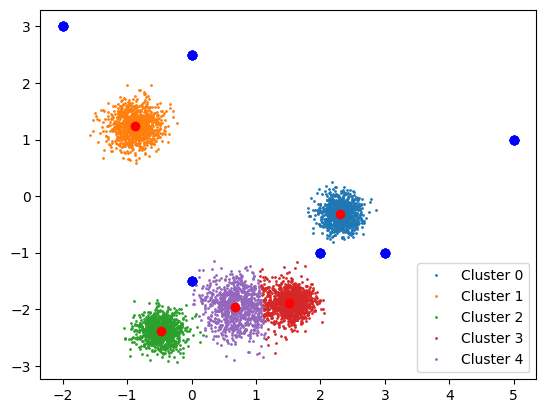

In [ ]:
for i in range(k):
    plt.plot(X[y_pred == i, 0], X[y_pred == i, 1], 'o', label="Cluster %d" % i, markersize=1)
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'o', color='red')
    plt.plot(X_new[:, 0], X_new[:, 1], 'o', color='blue')
    plt.legend()

In [ ]:
i = 0
for y in y_pred_new:
  print(f'El punto {X_new[i]} pertenece al cluster {y}')
  i += 1

El punto [0.  2.5] pertenece al cluster 1
El punto [ 3. -1.] pertenece al cluster 0
El punto [5. 1.] pertenece al cluster 0
El punto [-2.  3.] pertenece al cluster 1
El punto [ 2. -1.] pertenece al cluster 0
El punto [ 0.  -1.5] pertenece al cluster 4


# Funciones para graficar los siguientes puntos:

* Los datos (<b>plot_data</b>): Realiza un gráfico de dispersión para un conjunto de datos
* Los centroides (<b>plot_centroids</b>): Gráfica los centroides de los clusters
* Los limites de la trama (<b>plot_decision_boundaries</b>): Gráfica los limites de decisión de un algoritmo de Clustering

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):

    # Verifica sis se proporciono un arreglo de pesos
    if weights is not None:
        # Filtra los centroides, solo se mantendran aquellos cuyos pesos sean mayor al 10% del valor maximo de los pesos
        centroids = centroids[weights > weights.max() / 10]

    # Gráfica circulos para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    # gráfica cruces "x" para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

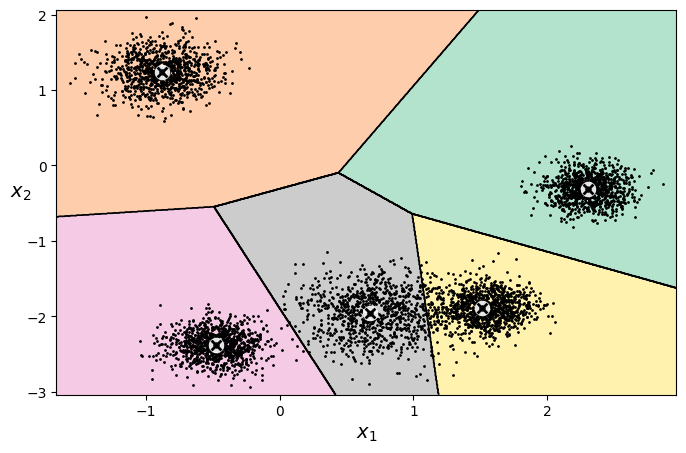

In [ ]:
plt.figure(figsize=(8, 5))
plot_decision_boundaries(kmeans, X)
plt.show()

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en funcion a su distancia al centroide.

In [ ]:
#aplica la transformacion de distancia del modelo K-Means a los nuevos datos X_new
kmeans.transform(X_new)

array([[3.63290541, 1.53858773, 4.90100931, 4.64504536, 4.51053115],
       [0.98090437, 4.47984573, 3.73661236, 1.73104333, 2.5168132 ],
       [2.99718467, 5.88541015, 6.43175701, 4.52732447, 5.24217588],
       [5.42882605, 2.08724623, 5.59063748, 6.02330488, 5.63459761],
       [0.75481081, 3.64799289, 2.83123355, 1.01390215, 1.63745606],
       [2.5934249 , 2.8764292 , 0.99749386, 1.56530778, 0.81554769]])

Este algoritmo funciona asignando centroides de manera aleatoria y de manera iterativa, asigna cada instancia a uno de ellos (el mas cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo

In [ ]:
# Creamos instancias para KMeans con diferentes configuraciones para el numero de iteraciones maximas del algoritmo
"""
n_clusters=k  ->  definimos el numero de clusters que queremos generar
init="random" ->  establece que los centroides iniciales se seleccionaran de manera aleatoria
n_init=1      ->  especifica cuantas veces se reiniciara el algoritmo con diferentes centroides iniciales
algorithm="elkan" ->  vision optimizada del algoritmo estandar que acelera los calculos utilizando la propiedad triangular de las distancias
max_iter=1000,2000,3000 ->  configuramos el numero de iteraciones maximas del algoritmo
random_state=1 ->  establecemos una semilla para que los resultados sean reproducibles
"""
kmeans_iter1 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", max_iter=1000, random_state=1)
kmeans_iter2 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", max_iter=2000, random_state=1)
kmeans_iter3 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", max_iter=3000, random_state=1)

# Entrenamos los modelos K-Means
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', init='random', max_iter=3000, n_clusters=5, n_init=1,
       random_state=1)

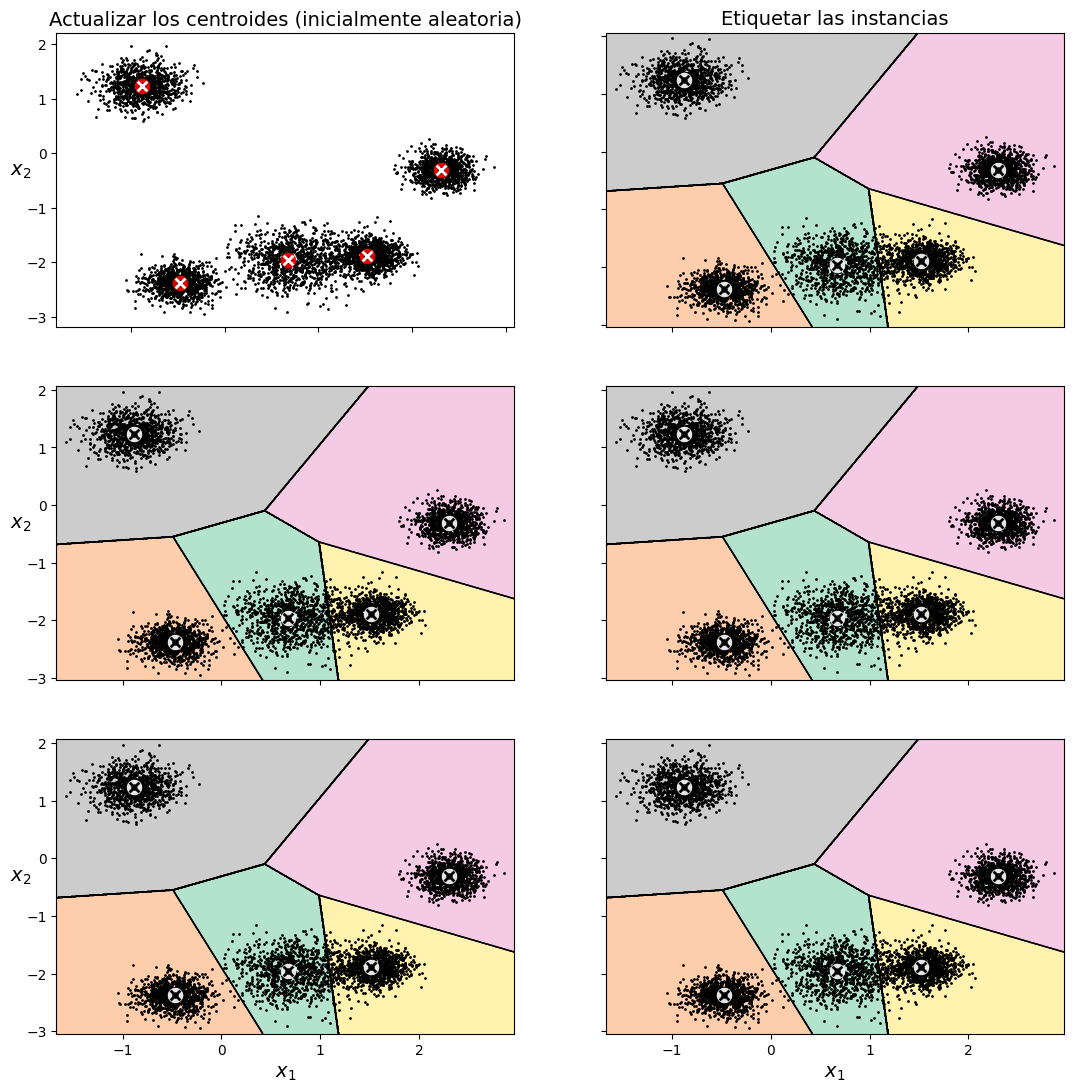

In [ ]:
plt.figure(figsize=(13, 13))

plt.subplot(321) # especifica 3 filas, 2 columnas y 1 la pocision en la figura
plot_data(X) # gráfica la dispersión del conjunto de datos
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w') # gráfica los centroides de los clusteres
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualizar los centroides (inicialmente aleatoria)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False) # Gráfica los limites de decisión de un algoritmo de Clustering
plt.title("Etiquetar las instancias", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solucion u otra

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

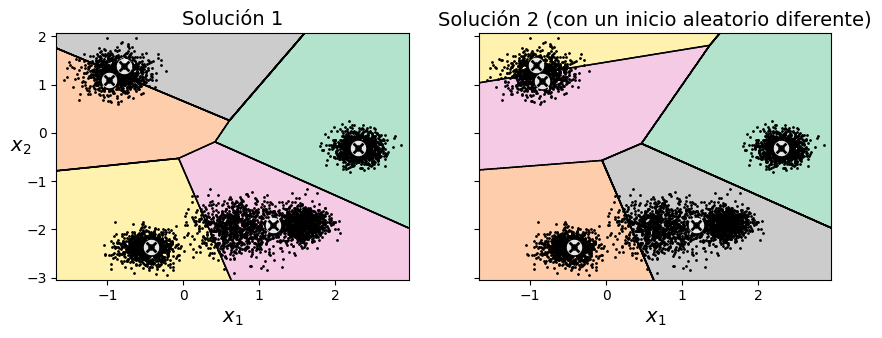

In [ ]:
# Crear dos instancias de KMeans con diferentes configuraciones de inicializacion aleatoria y algoritmo "elkan"
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", random_state=19)

# Utilizando la función "plot_clusterer_comparison" comparamos las soluciones de clustering
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,"Solución 1", "Solución 2 (con un inicio aleatorio diferente)")

# Mostrar los gráficos
plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [ ]:
# creamos un modelo KMeans que ejecutara el número de clusters ejecutando el proceso 10 veces para tener un mejor resultado
kmeans_rnd_10_inits = KMeans(n_clusters=k, init="random", n_init=10, algorithm="elkan", random_state=11)

# Entrenamos el modelo K-Means
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=5, n_init=10,
       random_state=11)

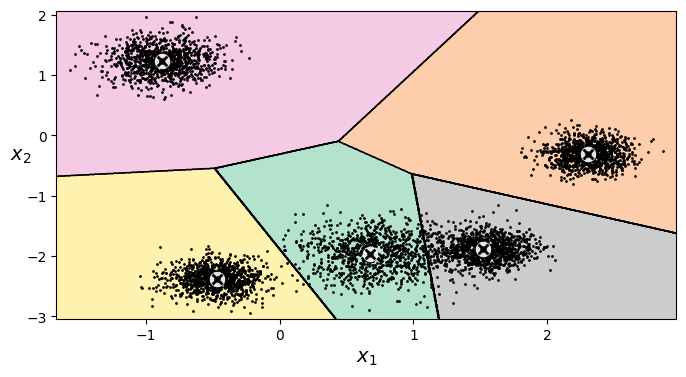

In [ ]:
# Graficamos el modelo K-Means
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

# Funcion para la creacion de lotes

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

In [ ]:
def load_next_batch(batch_size):
  indices = np.random.choice(len(X), size=batch_size) # elige aleatoriamente indices de X sin reemplazo
  return X[indices] # retorna los indices seleccionado

Esta funcion *load_next_batch* se utiliza para cargar un lote aleatorio de datos de tamaño *batch_size* de la matriz X, es util para entrenar modelos de aprendizaje automático utilizando el metodo de descenso de gradiente estocástico (SGD) o para procesar grandes conjuntos de datos de lotes durante el entrenamiento.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# definimos los parametros
k = n_clusters  # numero de clusters
n_init = 10 # número de inicializaciones diferentes
n_iterations = 100  # número máximo de iteraciones por inicialización
batch_size = 100  # tamaño del lote utilizado en cada iteración
init_size = 500 # tamaño del lote inicial para ajustar parcialmente el modelo
evaluate_on_last_n_iters = 10 # número de ultimas iteraciones utilizadas para evaluar el modelo

best_kmeans = None # para almacenar el mejor modelo encontrado

# bucle para realizar multiples inicializaciones y seleccionar el mejor modelo
for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size) #crea una instancia de MiniBatchKMeans pasandole los parametros especificos
    X_init = load_next_batch(init_size) # cargamos un lote inicial que utilizaremos para ajustar el modelo parcialmente
    minibatch_kmeans.partial_fit(X_init) # ajustar el modelo parcialmente

    minibatch_kmeans.sum_inertia_ = 0 # inicializa una suma

    # bucle para ajustar el modelo por lotes durante un numero fijo de iteraciones
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size) # cargamos un lote de datos para ajustar parcialmente el modelo
        minibatch_kmeans.partial_fit(X_batch) # ajusta el modelo parcialmente

        # calcula y acumula la inercia en las ultimas iteraciones
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Actualiza el mejor modelo encontrado hasta el momento
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [ ]:
# calculamos la puntuacion del modelo "best_kmeans" aplicado a los datos "X"
print(best_kmeans.score(X))

# visualizar los centroides del modelo "best_kmeans"
print(best_kmeans.cluster_centers_)

-420.9280118529093
[[ 2.29920101 -0.30635587]
 [-0.88006746  1.24545593]
 [ 0.66089287 -1.94676015]
 [ 1.51014609 -1.89076678]
 [-0.4651779  -2.38519646]]


# Encontramos el número optimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [ ]:
from sklearn.metrics import silhouette_score

# calcular el coeficiente de silueta para evaluar la cantidad de los clústeres
silhouette_score(X, kmeans.labels_)

0.7050954817334996

El coeficiente de silueta se utiliza para evaluar la cantidad de agrupación. Un valor de coeficiente de silueta cercano a 1 indica una buena separación entre los clusteres y una mala separacione entre los diferentes clusteres, mientras que un valor cercano a -1 indica qeu las muestras pueden estar asignadas al grupo incorrecto. Un número cercano a 0 indica qeu las muestras están cerca de la frontera entre los clústeres.

---

Calculando la métrica para diferentes números de clusters podemos encontrar el valor óptimo

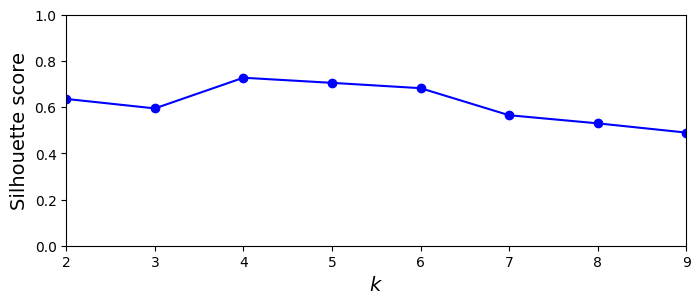

In [ ]:
# Crea una lista de modelos KMeans ajustados para diferentes números de clusters (de 1 a n)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]] # calculamos el coeficiente de silueta para cada modelo KMeans (Excepto el primero)

plt.figure(figsize=(8, 3))

# gráficar el coeficiente de silueta en funcion del número de clusters (de 2 a n)
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#  [x_min, x_max, y_min, y_max]
plt.axis([2, 9, 0, 1]) # establece el limite de los ejes de "x" e "y" para enfocar su visualización en un rango específico
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

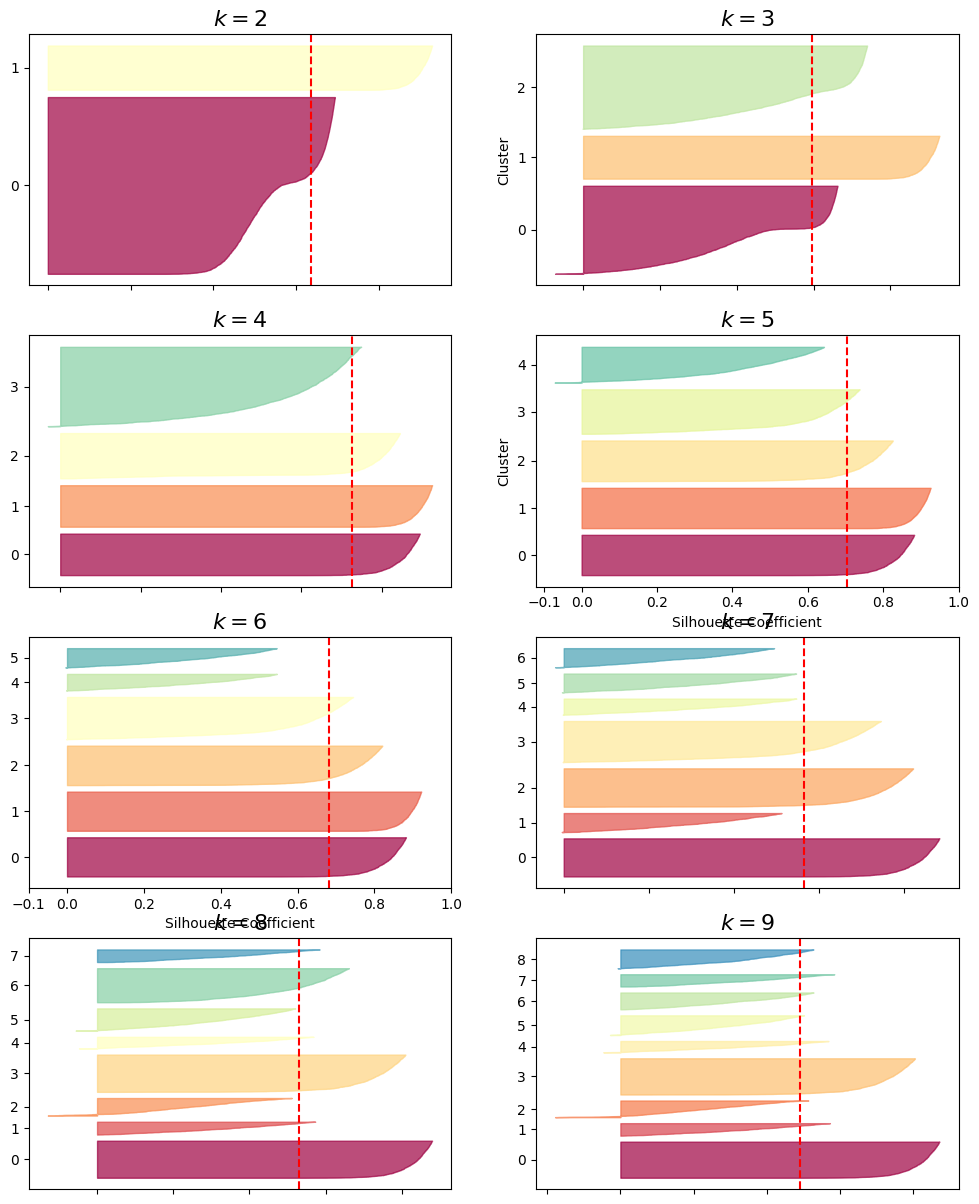

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(12, 15))

# Iterar sobre diferentes valores de k (número de clusters) para crear subplots
for k in (2, 3, 4, 5, 6, 7, 8, 9):
    # Crear subplots en una cuadrícula de 3 filas y 2 columnas, la posición es k-2 (para acomodar el primer subplot en 1)
    plt.subplot(4, 2, k - 1)

    # Obtener las etiquetas predichas por el modelo de KMeans para el valor actual de k
    y_pred = kmeans_per_k[k - 1].labels_

    # Calcular los coeficientes de silueta para cada muestra del conjunto de datos X y las etiquetas y_pred
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30 # Espacio entre clusters en el gráfico
    pos = padding  # Posición inicial para dibujar el primer clúster
    ticks = []  # Lista para almacenar la posición de las etiquetas del eje Y

    # Iterar sobre cada clúster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i] # Seleccionar los coeficientes de silueta para el cluster i
        coeffs.sort() # Ordenar los coeficientes de silueta

        color = mpl.cm.Spectral(i / k) # Asignar un color al área de relleno según el cluster

        # Dibujar un área sombreada para representar los coeficientes de silueta del clúster actual
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Agregar la posición del tick para el clúster actual
        ticks.append(pos + len(coeffs) // 2)

        # Actualizar la posición para el siguiente clúster (se suma el padding)
        pos += len(coeffs) + padding

    # Configurar el eje Y para que muestre etiquetas correspondientes a cada clúster
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # Configuración de etiquetas en los ejes
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False) # Ocultar etiquetas del eje X para subplots que no sean k=5 o k=6

    # Dibujar una línea roja discontinua que representa el coeficiente de silueta promedio para cada valor de k
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")

    # Configurar el título del subplot
    plt.title("$k={}$".format(k), fontsize=16)

# Mostrar todos los gráficos generados.
plt.show()


#Parte 2

## K-Means para aprendizaje semi-supervisado.

realizamos la conexion ala base de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


realizamos las importaciones necesarias para este parte

In [ ]:
from sklearn.datasets import make_blobs  # Importa la función make_blobs para generar conjuntos de datos simulados con una distribución específica.
import numpy as np  # Importa la biblioteca NumPy para manejar matrices y vectores (cálculos numéricos eficientes).

# used for manipulating directory paths
import os  # Importa la biblioteca os para manipular rutas y directorios del sistema de archivos.

# Plotting library
# Importa pyplot desde la biblioteca matplotlib, que se utiliza para generar gráficos y visualizaciones.
from matplotlib import pyplot as plt

# Optimization module in scipy
from scipy import optimize  # Importa el módulo optimize de scipy, que incluye funciones para la optimización matemática.

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat  # Importa la función loadmat de scipy.io, utilizada para cargar archivos en formato .mat de MATLAB.

import pandas as pd  # Importa pandas, una biblioteca para la manipulación y análisis de datos (manejo de tablas y dataframes).

# esta tabulate nos sirve para hacer tablas
from tabulate import tabulate  # Importa la función tabulate para mostrar datos en formato tabular (similar a tablas en texto o terminal).

# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split  # Importa la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba (separación de datos).
# Configura matplotlib para que las gráficas se muestren dentro del notebook (sólo se usa en entornos como Jupyter).
%matplotlib inline

cargamos el dataset

In [ ]:
# Cargar el dataset usando pandas leemos el archivo de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB - SIS420/LAB05 grupal/smoke_detection_iot.csv')

mostramos el dataset

In [ ]:
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


eliminanos la columna 0 que son los id unicos de los registros

In [ ]:
data = data.drop(data.columns[0], axis=1)

mostramos como queda el dataset

In [ ]:
data

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


realizamos la separacion de 20% test y 80% train

In [ ]:
from sklearn.model_selection import train_test_split


# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#Separamos en X_test los datos, pero dropeando nuestra y que seria 'CARDIO_DISEASE'
X_test = test_data.drop(['Fire Alarm'], axis=1).values
#Separamos en y_test los datos, pero solo cargando la columna de 'CARDIO_DISEASE', ya que esa sera nuestra y
y_test = test_data['Fire Alarm'].values
m_test = len(y_test)

# tomamos train_data, seleccionamos las columnas para X_train y la columna 'CARDIO_DISEASE' para y_train
X_train = train_data.drop(['Fire Alarm'], axis=1).values
y_train = train_data['Fire Alarm'].values
m_train = len(y_train)

#para la aplicacion de la silueta
X_train_subset = X_train[:2000]


en un primer modelo se tiene que no se conoce las etiquetas de nuestro dataset, es decir no se conocen las Y, ni cuantos tipos de clases se tiene en este dataset.

Lo que prosigue es hacer el uso de Kmeans para calcular cual seria el numero optimo de clusters

en este primer ejemplo se hace un calculo dandole un total de 50 clusters

In [ ]:
k

9

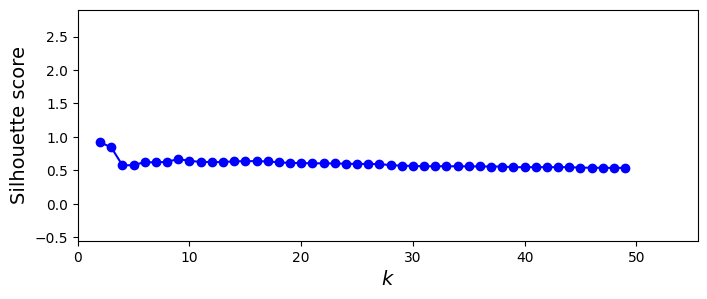

In [ ]:
# Genera una lista de modelos KMeans con diferente número de clusters (k) desde 1 hasta 49.
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_subset)
                for k in range(1, 50)]
# Calcula las puntuaciones de silhouette para cada modelo KMeans con k entre 2 y 49.
silhouette_scores = [silhouette_score(X_train_subset, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(8, 3))# Configuración de la gráfica.
plt.plot(range(2, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 55.5, -0.55, 2.9])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

print(X_digits_dist.shape)

(50104, 2)


como cada fila, en cada columna es una distancia al centroide, entonces debemos escoger las menor columna de cada columna, dandonos como resultado teniendo los indices mas representativos:

In [ ]:
idxs = np.argmin(X_digits_dist, axis=0)

print(idxs)
X_representative_digits = X_train[idxs]

print("Los valores mas representativos son", X_representative_digits)
print("La cantidad es: ",len(X_representative_digits))

[28047 48751]
Los valores mas representativos son [[1.65475143e+09 1.86560000e+01 5.08700000e+01 1.22800000e+03
  4.25000000e+02 1.29000000e+04 1.94310000e+04 9.38722000e+02
  1.66000000e+00 1.72000000e+00 1.14000000e+01 1.77700000e+00
  4.00000000e-02 1.80960000e+04]
 [1.65512848e+09 1.88740000e+01 4.18400000e+01 7.18500000e+03
  4.00000000e+02 1.30370000e+04 1.95080000e+04 9.36894000e+02
  3.90000000e-01 4.10000000e-01 2.69000000e+00 4.19000000e-01
  9.00000000e-03 4.17100000e+03]]
La cantidad es:  2


El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos
trampas ya que disponemos de dichas etiquetas).

In [ ]:
y_representative_digits = y_train[idxs]
print(y_representative_digits)

[1 0]


Y entrenaremos un modelo clasificador:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

CPU times: user 22.3 ms, sys: 1.75 ms, total: 24 ms
Wall time: 61.7 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.7740699345361648

#### Probando con datos aleatorias

Como puedes observar hemos obtenido una precisión de casi el $80%$ habiendo anotado simplemente 50 ejemplos, pero aquellas más representativas.

 Entrenar el mismo model

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

CPU times: user 31.3 ms, sys: 0 ns, total: 31.3 ms
Wall time: 97.6 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9609612007025388

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de ejemplos. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_== i] = y_representative_digits[i]

Creamos un nuevo modelo de regresion logistica:

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 140 ms, sys: 134 ms, total: 275 ms
Wall time: 295 ms


0.7839693437649689

## Aprendizaje Activo

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en los que el modelo tenga más problemas.

In [ ]:
#usamos el modelo entrenado, y obtenemos las probabilidades  probabilidades asignadas por un
# modelo de aprendizaje automático a cada una de las posibles clases de salida para una instancia de entrada dada.
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)]) #Zip une los dos arrays
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:2]]

array([0.50083455, 0.50209325])

In [ ]:
X_lowest = X_train[:1000][sorted_ixs[:k]]

print(X_lowest)

[[ 1.65512551e+09 -9.03200000e+00  4.61400000e+01  9.40000000e+01
   4.00000000e+02  1.27800000e+04  2.06280000e+04  9.37482000e+02
   2.13000000e+00  2.22000000e+00  1.46800000e+01  2.28900000e+00
   5.20000000e-02  1.20400000e+03]
 [ 1.65512572e+09 -8.13900000e+00  4.15500000e+01  8.60000000e+01
   4.00000000e+02  1.27910000e+04  2.06430000e+04  9.37465000e+02
   2.08000000e+00  2.16000000e+00  1.43300000e+01  2.23400000e+00
   5.00000000e-02  1.41700000e+03]]


In [ ]:
y_lowest = y_train[:1000][sorted_ixs[:k]]
y_lowest

array([0, 0])

In [ ]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)
#pero la queria tanto Que 5 min con ella eran 10 horas con cualquier otra

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 200 ms, sys: 190 ms, total: 389 ms
Wall time: 380 ms


0.7839693437649689